In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_f = './data/cluster/cluster_MB_v1_MB_EA_MB_EB/genebody_mCH_human_combined_cluster_MB_v1_MB_EA_MB_EB_mc_c.tsv'
output_f = './data/cluster/cluster_MB_v1_MB_EA_MB_EB/genebody_mCH_human_combined_cluster_MB_v1_MB_EA_MB_EB_mcc.tsv'
df = pd.read_table(input_f, index_col='id')
df.head()

,cluster_1_mc,cluster_1_c,cluster_10_mc,cluster_10_c,cluster_11_mc,cluster_11_c,cluster_12_mc,cluster_12_c,cluster_13_mc,cluster_13_c,...,cluster_66_mc,cluster_66_c,cluster_67_mc,cluster_67_c,cluster_7_mc,cluster_7_c,cluster_8_mc,cluster_8_c,cluster_9_mc,cluster_9_c
id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10,158,4117,202,5041,51,1554,103,3437,118,3736,...,175,4207,102,3850,287,4701,92,2027,223,5117
ENSG00000000005.5,363,4760,657,7190,192,1746,391,3648,578,6133,...,792,6996,341,4106,606,5401,276,2790,613,5998
ENSG00000000419.8,181,14708,247,22409,55,6678,95,10454,145,15432,...,177,16502,94,11413,197,17058,84,9679,215,18360
ENSG00000000457.9,678,31013,900,40790,440,13526,589,23641,637,33661,...,523,32542,263,22237,1086,31325,444,19355,779,30741
ENSG00000000460.12,4714,116258,7239,169769,3173,51411,5519,87213,6087,127043,...,8060,122622,3640,92095,7403,130076,3432,65582,6539,122854


In [3]:
df.shape

(57240, 134)

(25861, 134)


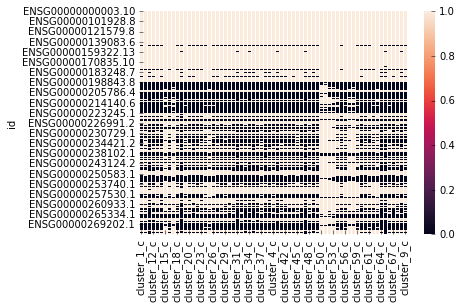

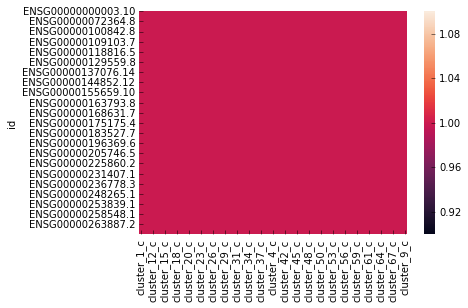

In [4]:
# threshold on low/high coveraged genes
# number of cells

plt.close('all')
cov = (df.filter(regex='_c$').apply(np.log10)>3)*1
gene_cov = cov.apply(np.all, axis=1)
df_filtered = df.loc[gene_cov, :]
print(df_filtered.shape)
cov_f = (df_filtered.filter(regex='_c$').apply(np.log10)>3)*1
sns.heatmap(cov)
plt.show()
sns.heatmap(cov_f)
plt.show()


(25861, 67)


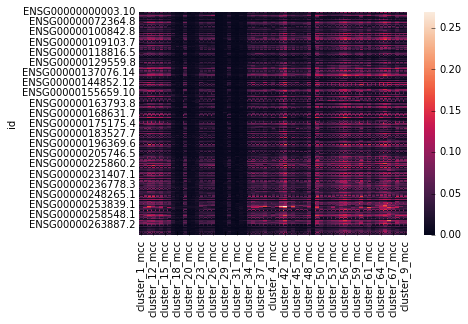

In [5]:
df_mc = df_filtered.filter(regex='_mc$')
df_c = df_filtered.filter(regex='_c$')
df_mc.columns = [col[:-len('_mc')] for col in df_mc.columns]
df_c.columns = [col[:-len('_c')] for col in df_c.columns]
df_mcc = df_mc/df_c
df_mcc.columns = [col+'_mcc' for col in df_mcc.columns]
print(df_mcc.shape)
sns.heatmap(df_mcc)
plt.show()

In [6]:
df_mcc.to_csv(output_f, na_rep='NA', header=True, index=True, sep='\t')